<center>

#<b>CS353 ML Lab 7</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section 2
### Date: 23/03/2021
---
###Q: Write a program in python to implement and demostrate <b>logistic regression</b> for a sample training dataset. Compute the accuracy of the classifier.
---
####<b>Dataset Used: Breast Cancer Dataset</b> 
</center>

##<b>Importing Libraries and Dataset</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import plot_confusion_matrix,precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report


##<b>Data Preprocessing</b>

In [2]:
dataset = load_breast_cancer()
data = pd.DataFrame(dataset.data, columns=[dataset.feature_names])
data['Target'] = pd.Series(data=dataset.target, index=data.index)

x,y = load_breast_cancer(return_X_y=True)
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
54,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,0.1616,0.05684,0.3105,0.8339,2.097,29.91,0.004675,0.01030,0.01603,0.009222,0.01095,0.001629,18.10,31.69,117.70,1030.0,0.13890,0.2057,0.2712,0.15300,0.2675,0.07873,0
190,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,0.2860,2.1100,2.112,31.72,0.007970,0.13540,0.11660,0.016660,0.05113,0.011720,15.74,37.18,106.40,762.4,0.15330,0.9327,0.8488,0.17720,0.5166,0.14460,0
481,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,0.3316,0.9264,2.056,28.41,0.003704,0.01082,0.01530,0.006275,0.01062,0.002217,16.41,26.42,104.40,830.5,0.10640,0.1415,0.1673,0.08150,0.2356,0.07603,1
485,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,0.3921,1.2070,5.004,30.19,0.007234,0.07471,0.11140,0.027210,0.03232,0.009627,13.78,21.03,97.82,580.6,0.11750,0.4061,0.4896,0.13420,0.3231,0.10340,1
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,0.2357,1.2990,2.397,20.21,0.003629,0.03713,0.03452,0.010650,0.02632,0.003705,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247,1


In [3]:
print("Label: ", dataset.target_names)

Label:  ['malignant' 'benign']


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
print('Training dataset size:\nx_train -', len(x_train), '\ny_train -', len(y_train), '\n')
print('Testing dataset size:\nx_test -', len(x_test), '\ny_test -', len(y_test))

Training dataset size:
x_train - 398 
y_train - 398 

Testing dataset size:
x_test - 171 
y_test - 171


In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## <b> Results </b>

In [7]:
print('-------------------------------')
print('Accuracy:                {:f}'.format(accuracy_score(y_test, y_pred)*100))
print('Precision:               {:f}'.format(precision_score(y_test, y_pred)*100))
print('Mean Squared Error:      {:f}'.format(mean_squared_error(y_test, y_pred)*100))
print('-------------------------------')

-------------------------------
Accuracy:                96.491228
Precision:               94.444444
Mean Squared Error:      3.508772
-------------------------------


In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        69
           1       0.94      1.00      0.97       102

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



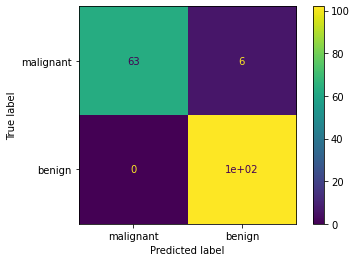

In [9]:
plot_confusion_matrix(model, x_test, y_test, display_labels=dataset.target_names)  
plt.show() 